In [89]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
import requests
from config import weather_api_key
from scipy.stats import linregress

In [90]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [91]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [92]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [94]:
url = "https://api.openweathermap.org/data/2.5/weather?lat=57&lon=-2.15&appid=" + weather_api_key + "&units=imperial"
print(url)

https://api.openweathermap.org/data/2.5/weather?lat=57&lon=-2.15&appid=0a7f3ad6dac47c9a83c206e08c0000f6&units=imperial


In [29]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [30]:
# Loop through the cities list.
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endpoint url with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | sorvag
City not found. Skipping...
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | rantepao
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | petrolina
Processing Record 6 of Set 1 | mataura
Processing Record 7 of Set 1 | oistins
Processing Record 8 of Set 1 | vaini
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | husavik
Processing Record 11 of Set 1 | hermanus
Processing Record 12 of Set 1 | anadyr
Processing Record 13 of Set 1 | albany
Processing Record 14 of Set 1 | iqaluit
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | castro
Processing Record 17 of Set 1 | gambo
Processing Record 18 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 19 of Set 1 | arraial do cabo
Processing Record 20 of Set 1 | lai
Processing Record 21 of Set 1 | antofagasta
Processing Record 22 of Set 1 | marcona
City not found. Skipping...
Processing Record 23 of S

Processing Record 39 of Set 4 | eureka
Processing Record 40 of Set 4 | sao joao da barra
Processing Record 41 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 42 of Set 4 | cayenne
Processing Record 43 of Set 4 | kaitangata
Processing Record 44 of Set 4 | bayburt
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | te anau
Processing Record 47 of Set 4 | neyshabur
Processing Record 48 of Set 4 | alice springs
Processing Record 49 of Set 4 | providencia
Processing Record 50 of Set 4 | evreux
Processing Record 1 of Set 5 | podor
Processing Record 2 of Set 5 | georgetown
Processing Record 3 of Set 5 | victoria
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | vostok
Processing Record 6 of Set 5 | tessalit
Processing Record 7 of Set 5 | dikson
Processing Record 8 of Set 5 | chiang khong
Processing Record 9 of Set 5 | altay
Processing Record 10 of Set 5 | airai
Processing Record 11 of Set 5 | kaspiyskiy
Processing Record 12 of 

Processing Record 29 of Set 8 | kamenka
Processing Record 30 of Set 8 | andenes
Processing Record 31 of Set 8 | qui nhon
Processing Record 32 of Set 8 | syedove
Processing Record 33 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 34 of Set 8 | paracatu
Processing Record 35 of Set 8 | rio rancho
Processing Record 36 of Set 8 | hirara
Processing Record 37 of Set 8 | sangar
Processing Record 38 of Set 8 | ous
Processing Record 39 of Set 8 | ponta delgada
Processing Record 40 of Set 8 | tsihombe
City not found. Skipping...
Processing Record 41 of Set 8 | biak
Processing Record 42 of Set 8 | kanchanaburi
Processing Record 43 of Set 8 | lorengau
Processing Record 44 of Set 8 | gizo
Processing Record 45 of Set 8 | vao
Processing Record 46 of Set 8 | aykhal
Processing Record 47 of Set 8 | goya
Processing Record 48 of Set 8 | maragogi
Processing Record 49 of Set 8 | genhe
Processing Record 50 of Set 8 | boyolangu
Processing Record 1 of Set 9 | moron
Processing Record 2 of S

Processing Record 15 of Set 12 | jiangyou
Processing Record 16 of Set 12 | uvarovo
Processing Record 17 of Set 12 | kutum
Processing Record 18 of Set 12 | tazovskiy
Processing Record 19 of Set 12 | college
Processing Record 20 of Set 12 | ondjiva
Processing Record 21 of Set 12 | sakaiminato
Processing Record 22 of Set 12 | kuching
Processing Record 23 of Set 12 | shache
Processing Record 24 of Set 12 | mongoumba
Processing Record 25 of Set 12 | bambanglipuro
Processing Record 26 of Set 12 | puerto colombia
Processing Record 27 of Set 12 | qingdao
Processing Record 28 of Set 12 | gwadar
Processing Record 29 of Set 12 | diamantino
Processing Record 30 of Set 12 | teacapan
Processing Record 31 of Set 12 | sabang
Processing Record 32 of Set 12 | winchendon
Processing Record 33 of Set 12 | burnie
Processing Record 34 of Set 12 | russell
Processing Record 35 of Set 12 | maniitsoq
Processing Record 36 of Set 12 | akdepe
Processing Record 37 of Set 12 | nome
Processing Record 38 of Set 12 | ra

In [31]:
len(city_data)

569

In [32]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bluff,-46.6000,168.3333,50.81,64,100,24.74,NZ,2022-04-25 18:58:37
1,Rantepao,-2.9701,119.8978,66.04,97,91,1.70,ID,2022-04-25 18:58:37
2,Atuona,-9.8000,-139.0333,78.12,79,26,15.68,PF,2022-04-25 18:58:38
3,Petrolina,-9.3986,-40.5008,93.25,38,20,13.80,BR,2022-04-25 18:58:39
4,Mataura,-46.1927,168.8643,50.49,81,54,7.20,NZ,2022-04-25 18:58:10
5,Oistins,13.0667,-59.5333,75.29,100,75,16.11,BB,2022-04-25 18:58:39
6,Vaini,-21.2000,-175.2000,71.76,94,100,13.80,TO,2022-04-25 18:58:40
7,Ushuaia,-54.8000,-68.3000,42.46,81,75,17.27,AR,2022-04-25 18:55:26
8,Husavik,66.0449,-17.3389,42.64,75,48,4.59,IS,2022-04-25 18:58:41
9,Hermanus,-34.4187,19.2345,53.80,71,0,5.50,ZA,2022-04-25 18:54:15


In [33]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df=city_data_df[new_column_order]

In [34]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [35]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

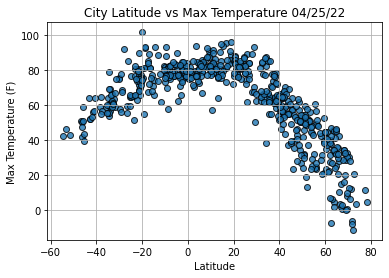

In [36]:
# Import time module
# Build scatter plot for latitude vs max temperature.
plt.scatter(lats,
           max_temps,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

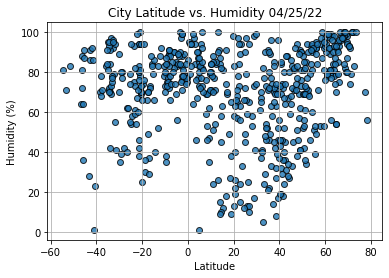

In [37]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

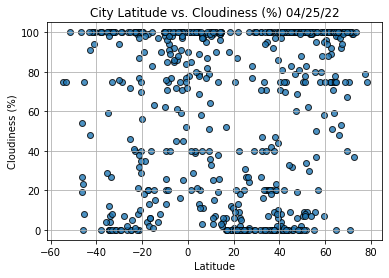

In [38]:
plt.scatter(lats,
           cloudiness,
           edgecolor="black", linewidth=1, marker="o",
           alpha=0.8, label="Cities")

plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

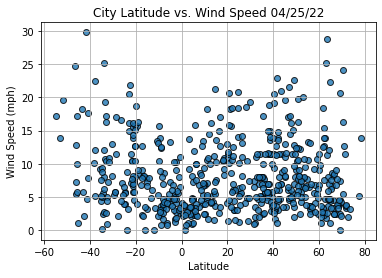

In [39]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [63]:
from scipy.stats import linregress

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values,y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [64]:
index13 = city_data_df.loc[13]
index13

City                  Yellowknife
Country                        CA
Date          2022-04-25 18:57:32
Lat                        62.456
Lng                     -114.3525
Max Temp                    37.92
Humidity                       56
Cloudiness                     75
Wind Speed                  12.66
Name: 13, dtype: object

In [65]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

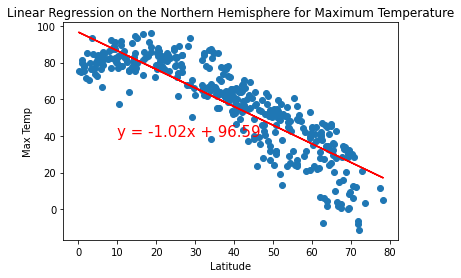

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

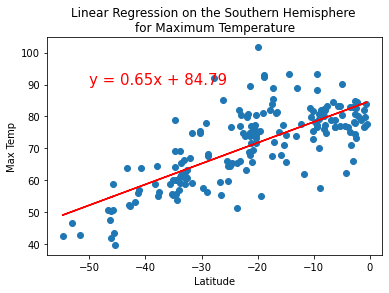

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))


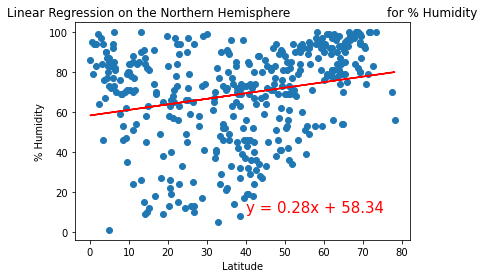

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

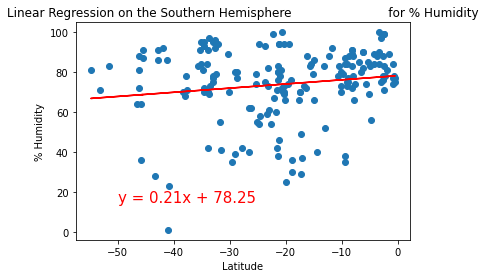

In [69]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

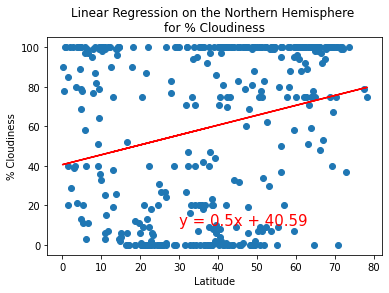

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(30,10))

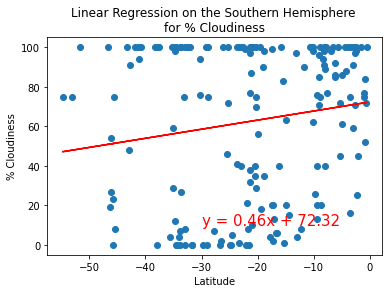

In [74]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', "% Cloudiness",(-30,10))

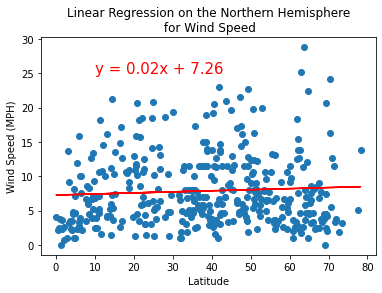

In [84]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed (MPH)', (10,25))

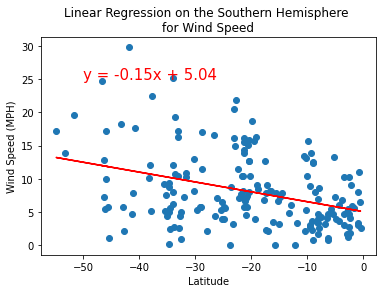

In [88]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 
                       'Wind Speed (MPH)',(-50,25))